In [2]:
# %% [markdown]
# # 🤖 WhatsApp Chat Style Mimicker
# 
# Este script analiza un chat de WhatsApp y puede imitar cómo habla cada persona.
# 
# ## 📝 Antes de empezar:
# 1. Exporta un chat de WhatsApp (sin medios)
# 2. Pon el archivo .txt en esta carpeta
# 3. Crea un archivo .env con tu API key de OpenAI

# %% [markdown]
# ## 📚 Importar lo necesario

# %%
import os
import re
import pandas as pd
from datetime import datetime
from openai import OpenAI
from dotenv import load_dotenv

# Cargar API key
load_dotenv()

# %% [markdown]
# ## 📂 Buscar archivos de chat

# %%
# Ver qué archivos de chat hay disponibles
chat_files = [f for f in os.listdir() if f.endswith('.txt')]

print("📁 Archivos encontrados:")
for i, file in enumerate(chat_files, 1):
    print(f"{i}. {file}")

if not chat_files:
    print("❌ No se encontraron archivos .txt")
    raise Exception("Necesitas exportar un chat de WhatsApp primero")


📁 Archivos encontrados:
1. Chat de WhatsApp con aMIGos.txt
2. Chat de WhatsApp con Claveles70.txt
3. Chat de WhatsApp con Monidos.txt
4. Chat de WhatsApp con SEJU-prisas ⛄🍆🐨🐜👓📜🥪🪨 🇪🇸-🇲🇽-🇬🇧.txt
5. Chatperitos.txt
6. requirements.txt


In [3]:

# Elegir un archivo
file_number = int(input("\nElige el número del archivo a analizar: "))
selected_file = chat_files[file_number - 1]
print(f"Archivo seleccionado: {selected_file}")

# %% [markdown]
# ## 📖 Leer y procesar el chat

# %%
# Leer el archivo y mostrar las primeras líneas para debug
with open(selected_file, 'r', encoding='utf-8') as file:
    content = file.read()
    
print("Primeras 5 líneas del archivo:")
print("\n".join(content.split('\n')[:5]))
print("\nTotal de líneas:", len(content.split('\n')))

# Intentar diferentes patrones de regex para WhatsApp
patterns = [
    # Patrón 1: Formato típico de WhatsApp
    r'(\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2})\s-\s([^:]+):\s(.+)',
    
    # Patrón 2: Con AM/PM
    r'(\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APMapm]{2})\s-\s([^:]+):\s(.+)',
    
    # Patrón 3: Formato alternativo
    r'\[(\d{1,2}/\d{1,2}/\d{2,4}\s\d{1,2}:\d{2}:\d{2})\]\s([^:]+):\s(.+)'
]

matches = []
used_pattern = None

for pattern in patterns:
    matches = re.findall(pattern, content, re.MULTILINE)
    if matches:
        used_pattern = pattern
        print(f"\n✅ Patrón encontrado: {pattern}")
        print(f"Mensajes encontrados: {len(matches)}")
        break

if not matches:
    print("\n❌ No se pudo encontrar un patrón válido en el archivo")
    print("Por favor, verifica que el archivo es una exportación de WhatsApp")
    raise Exception("Formato de archivo no reconocido")

# Crear DataFrame
df = pd.DataFrame(matches, columns=['datetime', 'sender', 'message'])
print("\nEstructura del DataFrame:")
print(df.head())


Archivo seleccionado: Chat de WhatsApp con Claveles70.txt
Primeras 5 líneas del archivo:
10/11/21, 22:17 - El creador del grupo creó el grupo "Claveles58".
10/11/21, 22:17 - Se te añadió al grupo.
19/11/21, 20:06 - Padre: <Multimedia omitido>
19/11/21, 20:15 - Tio Paco: <Multimedia omitido>
19/11/21, 20:15 - Tio Paco: <Multimedia omitido>

Total de líneas: 62321

✅ Patrón encontrado: (\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2})\s-\s([^:]+):\s(.+)
Mensajes encontrados: 54603

Estructura del DataFrame:
          datetime    sender               message
0  19/11/21, 20:06     Padre  <Multimedia omitido>
1  19/11/21, 20:15  Tio Paco  <Multimedia omitido>
2  19/11/21, 20:15  Tio Paco  <Multimedia omitido>
3  19/11/21, 20:16  Tio Paco  <Multimedia omitido>
4  19/11/21, 20:16  Tio Paco  <Multimedia omitido>


In [4]:

# Ver miembros del chat
members = df['sender'].unique().tolist()


print(f"\n👥 Miembros encontrados ({len(members)}):")
for i, member in enumerate(members, 1):
    print(f"{i}. {member}")

if not members:
    print("❌ No se encontraron miembros en el chat")
    raise Exception("No se pudieron extraer los miembros del chat")

# %% [markdown]
# ## 🎯 Seleccionar miembro y analizar su estilo



👥 Miembros encontrados (71):
1. Padre
2. Tio Paco
3. Merche Tía
4. Trini Mesa
5. +34 646 51 90 62
6. Joaquín García Clavel
7. Orisa Clavel
8. Carlos Clavel Sainz
9. Miguel Mesa
10. Cristina Prima
11. Vanessa Prima
12. Maria Clavel Claver
13. Ciuquina Clavel
14. +65 9856 4681
15. Dodo García
16. Luis Mesa del Castillo
17. +34 678 48 50 42
18. +34 696 97 47 80
19. M Antonia Tía
20. Araceli Clavel
21. Madre
22. +34 647 62 45 15
23. Lola Vidal
24. Manuel Garcia
25. Mercedes De La Peña
26. Maria Matilde Clavel Sainz
27. Manolo Clavel Sainz
28. Isabel Mesa Del Castillo
29. +34 683 57 73 35
30. Manolo Mesa
31. Bea Garcia Prima
32. +34 646 87 79 97
33. +34 619 27 49 53
34. Gonzalo Primo
35. Manolo
36. Laura Prima
37. +1 (323) 590-6825
38. Lucia Jiménez
39. Juan
40. Ciuquina De La Peña
41. Ángela De La Peña
42. Ana Mesa Del Castillo
43. Adrián Antuña
44. Javier Santiago
45. Jorge Fin
46. +1 (714) 326-3799
47. +34 606 94 59 32
48. +34 626 97 73 95
49. +34 659 99 87 97
50. Luichi
51. +34 669 85 

In [5]:

# %%
# Elegir miembro
member_number = int(input("\nElige el número del miembro a imitar: "))
selected_member = members[member_number - 1]

# Obtener mensajes del miembro
member_messages = df[df['sender'] == selected_member]['message'].tolist()
sample_messages = member_messages[-20:] if len(member_messages) > 20 else member_messages

print(f"\nAnalizando los últimos {len(sample_messages)} mensajes de {selected_member}")
print("\nEjemplos de mensajes:")
for i, msg in enumerate(sample_messages[:3], 1):
    print(f"{i}. {msg}")



Analizando los últimos 20 mensajes de Tio Paco

Ejemplos de mensajes:
1. Con lo facil que es,
2. Ahora lo de E36 no lo entiendo ..
3. Y lo de la casa 4 Esquinas tampoco!


In [6]:

# %% [markdown]
# ## 💬 Generar mensaje en su estilo
load_dotenv()
# %%
# Configurar OpenAI
client = OpenAI(api_key=os.getenv('OPENAI_API_KEY'))

# Preparar el prompt
prompt = input("\nEscribe el mensaje que quieres generar: ")

system_prompt = f"""Estás imitando el estilo de habla de una persona de WhatsApp.
Aquí hay algunos mensajes de ejemplo de esta persona:

{chr(10).join(f'- {msg}' for msg in sample_messages)}

Genera una respuesta que coincida con su estilo de habla, incluyendo:
- Tono y vocabulario similar
- Mismo uso de emojis
- Mismos patrones de escritura
- Forma similar de expresarse"""

# Generar respuesta
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": prompt}
    ],
    temperature=0.7,
    max_tokens=150
)

print(f"\n💬 Mensaje generado en el estilo de {selected_member}:")
print(response.choices[0].message.content)

# %% [markdown]
# ## 🔄 ¿Generar otro mensaje?

# %%
# Puedes ejecutar la celda anterior de nuevo con un prompt diferente
# O volver a la celda de selección de miembro para elegir otra persona 


💬 Mensaje generado en el estilo de Tio Paco:
¡Hey! Todo bien, ¿y tú? ¿Qué planes tienes para hoy? 🤔


In [8]:

print("💬 Generando un mensaje típico de cada miembro...")

# Lista de prompts
prompts = [
    # Relacionados con bebidas/salir
    "¿Buenos días, que haces esta tarde?",
    
]

# Para cada prompt
for p in prompts:
    print(f"\n📌 Procesando prompt: {p}")
    print("=" * 50)
    
    # Para cada miembro, generar un mensaje típico
    for member in members:
        print(f"\n👤 Generando mensaje típico de: {member}")
        
        # Obtener mensajes del miembro
        member_messages = df[df['sender'] == member]['message'].tolist()
        sample_messages = member_messages[-10:] if len(member_messages) > 10 else member_messages
        
        # Crear el prompt del sistema
        system_prompt = f"""Estás imitando el estilo de habla de una persona de WhatsApp.
Aquí hay algunos mensajes de ejemplo de esta persona:

{chr(10).join(f'- {msg}' for msg in sample_messages)}

Genera una respuesta que coincida con su estilo de habla, incluyendo:
- Tono y vocabulario similar 
- Mismo uso de emojis
- Mismos patrones de escritura
- Forma similar de expresarse
- En general intenta que las respuestas no sean excesivamente positivas si la persona no lo es
- Que saque temas que esa persona saca habitualmente
- Que represente la personalidad de esa persona
"""

        try:
            # Generar respuesta usando OpenAI
            response = client.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[
                    {"role": "system", "content": system_prompt},
                    {"role": "user", "content": p}
                ],
                temperature=0.7,
                max_tokens=100
            )

            print(f"🗨️ Prompt: {p}")
            print(f"💭 Respuesta: {response.choices[0].message.content}")

        except Exception as e:
            print(f"❌ Error generando mensaje para {member}: {str(e)}")
        print("-" * 50)

💬 Generando un mensaje típico de cada miembro...

📌 Procesando prompt: ¿Buenos días, que haces esta tarde?

👤 Generando mensaje típico de: Padre
🗨️ Prompt: ¿Buenos días, que haces esta tarde?
💭 Respuesta: ¡Holaaa! Pues esta tarde estoy pensando en ir a tomar algo con unos amigos, ¿te apuntas? 🍻🤪
--------------------------------------------------

👤 Generando mensaje típico de: Tio Paco
🗨️ Prompt: ¿Buenos días, que haces esta tarde?
💭 Respuesta: Holaaa! Pues esta tarde tengo pensado ver el partido del Atleti, que está en un momento de forma increíble 💪🔴⚪ ¿Tú qué planes tienes?
--------------------------------------------------

👤 Generando mensaje típico de: Merche Tía
🗨️ Prompt: ¿Buenos días, que haces esta tarde?
💭 Respuesta: Holaa! Pues de momento estoy en casa viendo Netflix 📺, ¿tú qué planes tienes para hoy? 🤔
--------------------------------------------------

👤 Generando mensaje típico de: Trini Mesa
🗨️ Prompt: ¿Buenos días, que haces esta tarde?
💭 Respuesta: Holaaa! Pues esta ta

In [9]:
print("\n📊 Análisis estadístico del chat")
print("=" * 50)

# Obtener los 20 miembros que más hablan
top_members = df['sender'].value_counts().nlargest(20).index.tolist()

# Función para obtener las palabras más frecuentes
from collections import Counter

def get_top_words(messages, n=3):
    # Filtrar mensajes que contienen multimedia o palabras no deseadas
    filtered_messages = [msg for msg in messages if not any(x in msg.lower() for x in ['<multimedia', 'omitido', 'imagen', 'sticker', 'gif', 'audio', 'video'])]
    # Unir todos los mensajes filtrados y dividir en palabras
    words = ' '.join(filtered_messages).lower().split()
    # Filtrar palabras cortas y stopwords básicas
    filtered_words = [w for w in words if len(w) > 3 and w not in ['para', 'pero', 'como', 'esto', 'esta','este','pues','está']]
    return Counter(filtered_words).most_common(n)

# Función para calcular mensajes por día (asumiendo que 'date' está en el DataFrame)
def messages_per_day(messages_df):
    if 'date' not in df.columns:
        return "No disponible (falta columna 'date')"
    # Calcular el rango de días del chat
    days = (df['date'].max() - df['date'].min()).days + 1  # +1 para incluir el primer día
    if days == 0:
        days = 1  # Evitar división por cero
    num_messages = len(messages_df)
    return num_messages / days

# Análisis por miembro
for person in top_members:
    print(f"\n👤 {person}")
    print("-" * 50)
    
    # Filtrar mensajes del miembro
    person_df = df[df['sender'] == person]
    person_messages = person_df['message'].tolist()
    
    if not person_messages:
        print("  No tiene mensajes.")
        continue
    
    # Número de mensajes
    num_messages = len(person_messages)
    print(f"📝 Número de mensajes: {num_messages}")
    
    # Palabras más frecuentes
    top_words = get_top_words(person_messages)
    print("🔤 Palabras más frecuentes:")
    if top_words:
        for word, count in top_words:
            print(f"  - {word}: {count} veces")
    else:
        print("  - No hay palabras significativas.")
    
    
print("=" * 50)


📊 Análisis estadístico del chat

👤 Tio Paco
--------------------------------------------------
📝 Número de mensajes: 15039
🔤 Palabras más frecuentes:
  - felicidades: 259 veces
  - muchas: 232 veces
  - vamos: 217 veces

👤 Orisa Clavel
--------------------------------------------------
📝 Número de mensajes: 3815
🔤 Palabras más frecuentes:
  - felicidades: 330 veces
  - muchas: 327 veces
  - buenos: 130 veces

👤 Maria Matilde Clavel Sainz
--------------------------------------------------
📝 Número de mensajes: 2652
🔤 Palabras más frecuentes:
  - felicidades: 293 veces
  - muchas: 114 veces
  - familia: 83 veces

👤 Padre
--------------------------------------------------
📝 Número de mensajes: 2297
🔤 Palabras más frecuentes:
  - felicidades: 287 veces
  - muchas: 97 veces
  - feliz: 38 veces

👤 M Antonia Tía
--------------------------------------------------
📝 Número de mensajes: 1787
🔤 Palabras más frecuentes:
  - felicidades: 271 veces
  - muchas: 146 veces
  - feliz: 103 veces

👤 Ciuq


📈 Generando gráfica temporal de mensajes...


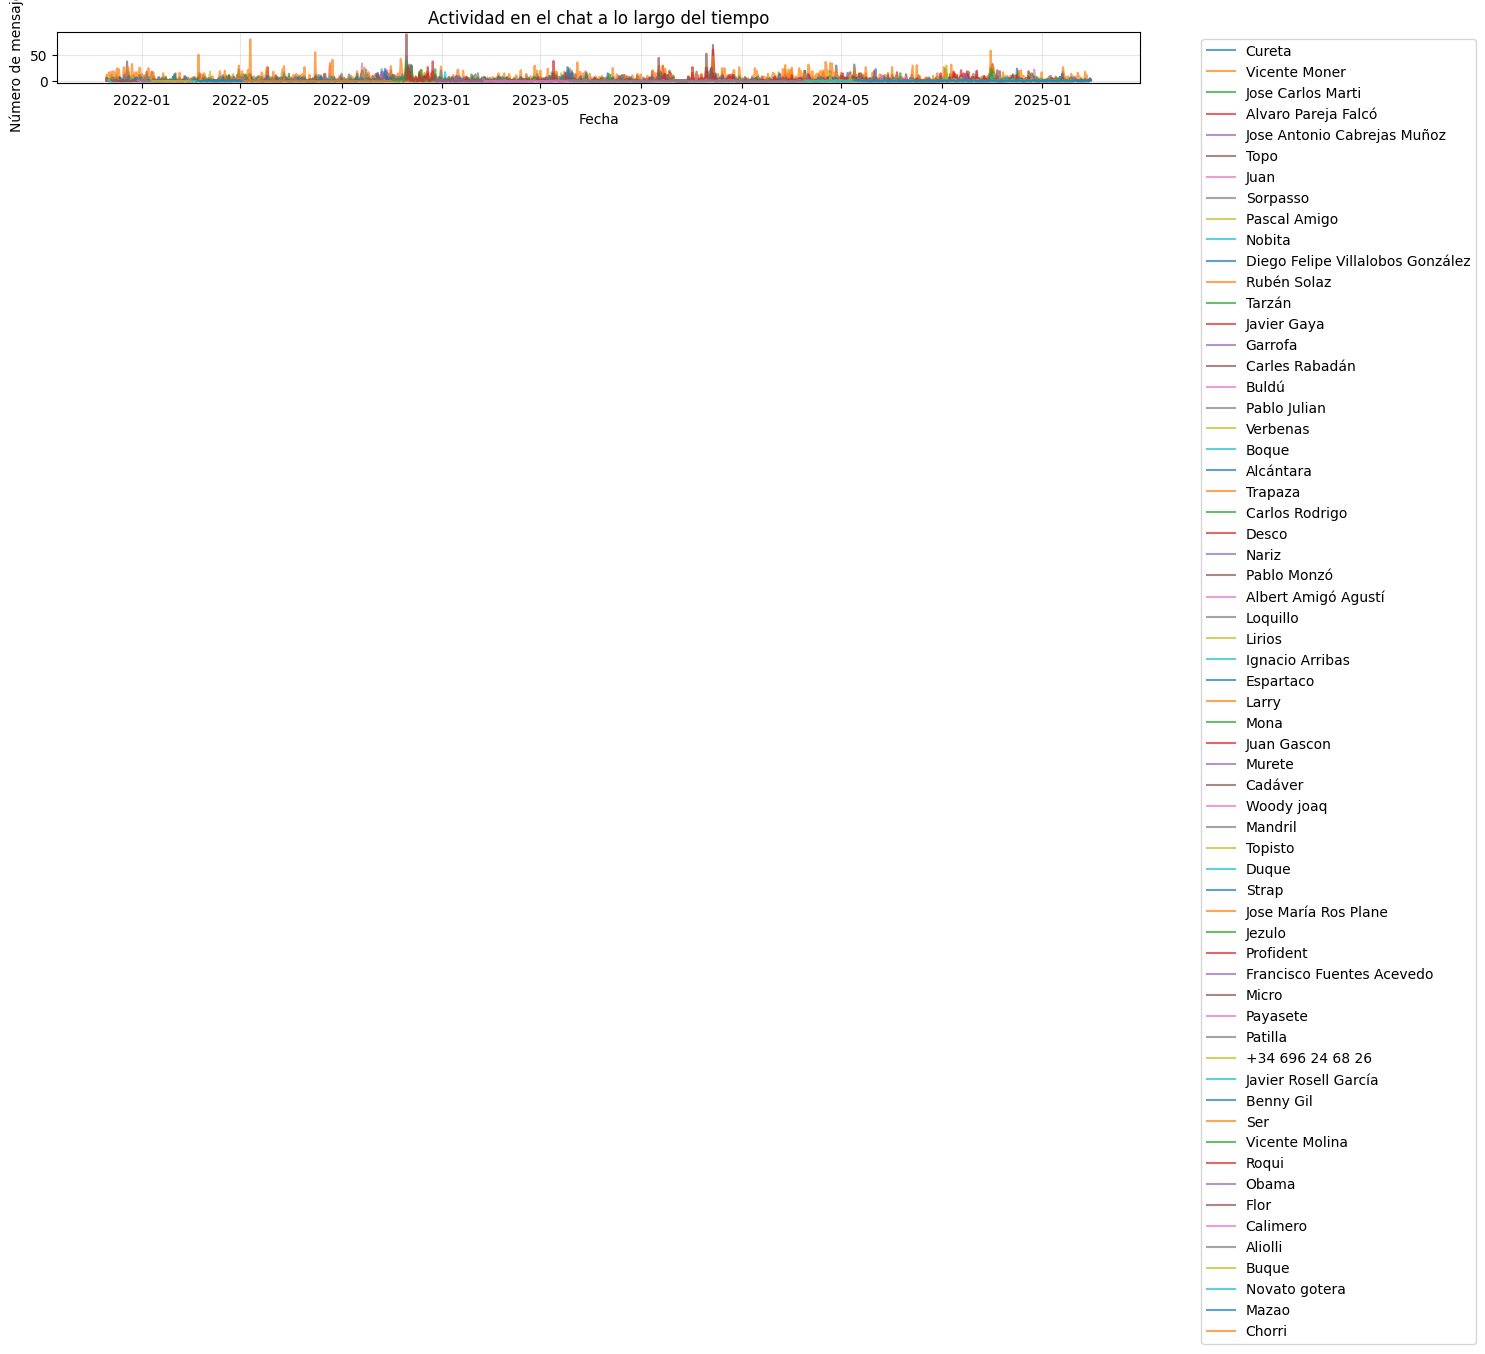


☁️ Generando nubes de palabras...


NameError: name 'WordCloud' is not defined

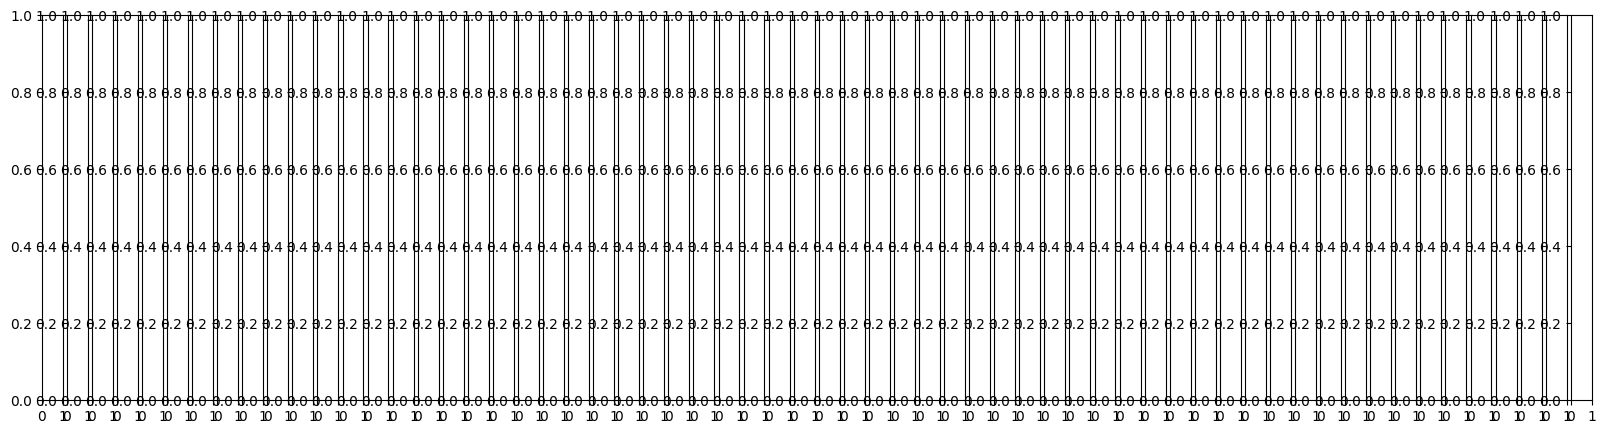

In [12]:
import matplotlib.pyplot as plt
# Gráfica de mensajes a lo largo del tiempo
print("\n📈 Generando gráfica temporal de mensajes...")

# Convertir fechas a datetime si no lo están ya
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%y, %H:%M')

# Crear figura
plt.figure(figsize=(15, 8))

# Graficar mensajes por persona a lo largo del tiempo
for person in members:
    person_data = df[df['sender'] == person]
    messages_over_time = person_data.groupby(pd.Grouper(key='datetime', freq='D')).size()
    plt.plot(messages_over_time.index, messages_over_time.values, label=person, alpha=0.7)

plt.title('Actividad en el chat a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de mensajes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Crear una nube de palabras para cada persona
print("\n☁️ Generando nubes de palabras...")

fig, axs = plt.subplots(1, len(members), figsize=(20, 5))
if len(members) == 1:
    axs = [axs]

for idx, person in enumerate(members):
    person_messages = ' '.join(df[df['sender'] == person]['message'])
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         max_words=100).generate(person_messages)
    
    axs[idx].imshow(wordcloud, interpolation='bilinear')
    axs[idx].axis('off')
    axs[idx].set_title(f'Palabras frecuentes de {person}')

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import emoji
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Supongamos que df ya está cargado con columnas: datetime, sender, message
# Si no tienes 'type', crearlo detectando mensajes multimedia
df['type'] = df['message'].apply(lambda x: 'media' if '<Multimedia omitido>' in x else 'text')

# Convertir 'datetime' a formato datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='%d/%m/%Y, %H:%M')

# Extraer hora y día de la semana
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

# **1. Gráfico de barras: Mensajes por persona**
plt.figure(figsize=(10, 6))
messages_per_person = df['sender'].value_counts().head(20)  # Top 20
messages_per_person.plot(kind='bar', color='skyblue')
plt.title('Top 20: Mensajes por persona')
plt.xlabel('Miembro')
plt.ylabel('Número de mensajes')
plt.xticks(rotation=45)
plt.show()

# **2. Gráfico de líneas: Actividad a lo largo del tiempo (por día)**
daily_activity = df.resample('D', on='datetime').size()
plt.figure(figsize=(12, 6))
daily_activity.plot(kind='line', color='green')
plt.title('Actividad diaria del chat')
plt.xlabel('Fecha')
plt.ylabel('Número de mensajes')
plt.show()

# **3. Gráfico de pastel: Distribución de tipos de mensajes**
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 8))
type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Distribución de tipos de mensajes')
plt.ylabel('')
plt.show()

# **4. Nube de palabras: Palabras más comunes**
nltk.download('stopwords')  # Descargar stopwords si no lo has hecho
words = ' '.join(df['message']).lower().split()
stop_words = set(stopwords.words('spanish'))  # Palabras vacías en español
filtered_words = [w for w in words if w not in stop_words and len(w) > 2]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras más comunes')
plt.show()

# **5. Heatmap: Interacción entre miembros (menciones)**
# Detectar menciones con '@' (simplificado)
df['mentions'] = df['message'].str.findall(r'@(\w+)')
interaction_matrix = pd.crosstab(df['sender'], df['mentions'].apply(lambda x: x[0] if x else None))
plt.figure(figsize=(10, 8))
sns.heatmap(interaction_matrix, cmap='Blues', annot=True, fmt='d')
plt.title('Interacción entre miembros (menciones)')
plt.show()

# **6. Gráfico de dispersión: Longitud del mensaje vs. tiempo de respuesta**
# Calcular tiempo hasta el siguiente mensaje
df['time_to_next'] = df['datetime'].shift(-1) - df['datetime']
df['time_to_next_minutes'] = df['time_to_next'].dt.total_seconds() / 60
df['message_length'] = df['message'].str.len()

# Filtrar outliers (tiempos > 60 minutos)
scatter_data = df[df['time_to_next_minutes'] < 60]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='message_length', y='time_to_next_minutes', data=scatter_data, alpha=0.5)
plt.title('Longitud del mensaje vs. Tiempo hasta la siguiente respuesta')
plt.xlabel('Longitud del mensaje')
plt.ylabel('Tiempo hasta la siguiente respuesta (minutos)')
plt.show()

# **7. Gráfico de barras apiladas: Actividad por hora y día**
pivot_table = df.pivot_table(index='day_of_week', columns='hour', values='message', aggfunc='count', fill_value=0)
# Reordenar días de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_order)

plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Actividad por hora y día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de mensajes')
plt.legend(title='Hora', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

ModuleNotFoundError: No module named 'nltk'